In [1]:
import pandas as pd
import numpy as np

In [2]:
header = ['Native Speaker', 'Course Instructor', 'Course', 'Semester', 'Class Size', 'Class Atribute']
df = pd.read_csv('evaluation.csv', names = header, header = None)
df.head()

,Native Speaker,Course Instructor,Course,Semester,Class Size,Class Atribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [3]:
#Memeriksa Jenis Data setiap Variabel
df.dtypes

Native Speaker       int64
Course Instructor    int64
Course               int64
Semester             int64
Class Size           int64
Class Atribute       int64
dtype: object

In [4]:
#Mengubah jenis data kategorikal pada variabel CHAS
df["Class Atribute"] = df["Class Atribute"].astype('category')

In [5]:
#Memeriksa dimensi data
np.shape(df)

(151, 6)

In [6]:
#Memeriksa missing value setiap variabel
df.isnull().any()

Native Speaker       False
Course Instructor    False
Course               False
Semester             False
Class Size           False
Class Atribute       False
dtype: bool

In [7]:
#Transforming variabel prediktor dengan metode MinMaxScaler
from sklearn import preprocessing
transformasi_min_max=preprocessing.MinMaxScaler()

In [8]:
#Membagi data menjadi variabel target dan atribut
target = 'Class Atribute'
x = df.drop('Class Atribute', axis=1)
y =df[target]
nama_var_x=['Native Speaker','Course Instructor','Course','Semester', 'Class Size']
x = pd.DataFrame(data=transformasi_min_max.fit_transform(x), columns=nama_var_x)

In [9]:
x

,Native Speaker,Course Instructor,Course,Semester,Class Size
0,0.0,0.916667,0.08,0.0,0.253968
1,1.0,0.583333,0.08,0.0,0.222222
2,0.0,0.916667,0.08,1.0,0.730159
3,0.0,0.166667,0.04,1.0,0.476190
4,1.0,0.250000,0.40,1.0,0.825397
...,...,...,...,...,...
146,1.0,0.083333,0.04,1.0,0.365079
147,1.0,0.375000,0.08,1.0,0.142857
148,0.0,0.708333,0.24,1.0,0.714286
149,1.0,0.875000,0.00,1.0,0.761905


# Pembagian data rasio 70 : 30

In [10]:
#Membagi data menjadi data training dan data testing (70% Training dan 30% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)

### Data Eksplorasi

In [11]:
#Melihat seberapa banyak nilai 1, 2, 3 pada Variabel Class Atribute
df['Class Atribute'].value_counts()

3    52
2    50
1    49
Name: Class Atribute, dtype: int64

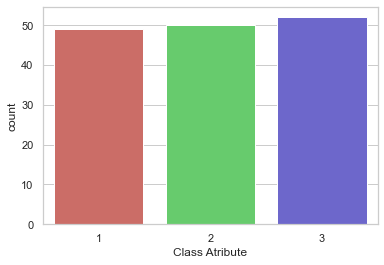

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Class Atribute',data=df,palette='hls')
plt.show()
plt.savefig('count_plot') 

### Regresi Logistik

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [14]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[11  3  3]
 [ 6  5  5]
 [ 1  3  9]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.61      0.65      0.63        17
           2       0.45      0.31      0.37        16
           3       0.53      0.69      0.60        13

    accuracy                           0.54        46
   macro avg       0.53      0.55      0.53        46
weighted avg       0.53      0.54      0.53        46



### Naive Bayes

In [17]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [18]:
y_pred = gnb.predict(x_test)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12  2  3]
 [11  1  4]
 [ 1  3  9]]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      0.71      0.59        17
           2       0.17      0.06      0.09        16
           3       0.56      0.69      0.62        13

    accuracy                           0.48        46
   macro avg       0.41      0.49      0.43        46
weighted avg       0.40      0.48      0.42        46



# Pembagian data rasio 75 : 25

### Regresi Logistik

In [21]:
#Membagi data menjadi data training dan data testing (75% Training dan 25% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [23]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [5 5 2]
 [1 3 9]]


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.69      0.64        13
           2       0.45      0.42      0.43        12
           3       0.75      0.69      0.72        13

    accuracy                           0.61        38
   macro avg       0.60      0.60      0.60        38
weighted avg       0.61      0.61      0.60        38



### Naive Bayes

In [26]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred = gnb.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [6 4 2]
 [1 3 9]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.40      0.33      0.36        12
           3       0.75      0.69      0.72        13

    accuracy                           0.58        38
   macro avg       0.57      0.57      0.57        38
weighted avg       0.58      0.58      0.57        38



# Pembagian data rasio 80 : 20

### Regresi Logistik

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [31]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [5 5 2]
 [1 3 9]]


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.69      0.64        13
           2       0.45      0.42      0.43        12
           3       0.75      0.69      0.72        13

    accuracy                           0.61        38
   macro avg       0.60      0.60      0.60        38
weighted avg       0.61      0.61      0.60        38



### Naive Bayes

In [34]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [35]:
y_pred = gnb.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [6 4 2]
 [1 3 9]]


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.40      0.33      0.36        12
           3       0.75      0.69      0.72        13

    accuracy                           0.58        38
   macro avg       0.57      0.57      0.57        38
weighted avg       0.58      0.58      0.57        38



# Pembagian data rasio 90 : 10

### Regresi Logistik

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [39]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [5 5 2]
 [1 3 9]]


In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.60      0.69      0.64        13
           2       0.45      0.42      0.43        12
           3       0.75      0.69      0.72        13

    accuracy                           0.61        38
   macro avg       0.60      0.60      0.60        38
weighted avg       0.61      0.61      0.60        38



### Naive Bayes

In [42]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [43]:
y_pred = gnb.predict(x_test)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9 3 1]
 [6 4 2]
 [1 3 9]]


In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.69      0.62        13
           2       0.40      0.33      0.36        12
           3       0.75      0.69      0.72        13

    accuracy                           0.58        38
   macro avg       0.57      0.57      0.57        38
weighted avg       0.58      0.58      0.57        38

